# Deep Learning A Z Autoencoder simples dígitos

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense
import matplotlib.pyplot as plt

In [8]:
(X_treinamento, _), (X_teste, _) = mnist.load_data()
print(X_treinamento.shape, X_teste.shape)
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

(60000, 28, 28) (10000, 28, 28)


In [7]:
X_treinamento[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# 784 -> 32 -> 784
autoencoder = Sequential()
autoencoder.add(InputLayer(shape = (784,)))
autoencoder.add(Dense(units = 32, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.layers[0], autoencoder.layers[1]

(<Dense name=dense, built=True>, <Dense name=dense_1, built=True>)

In [11]:
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
historico = autoencoder.fit(X_treinamento, X_treinamento, epochs=50, batch_size = 256, validation_data=(X_teste, X_teste)) # aqui, se coloca duas vezes o treinamento por gerar uma nova saida igual

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0082 - loss: 0.3839 - val_accuracy: 0.0157 - val_loss: 0.1951
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0153 - loss: 0.1834 - val_accuracy: 0.0147 - val_loss: 0.1545
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0121 - loss: 0.1501 - val_accuracy: 0.0116 - val_loss: 0.1342
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0113 - loss: 0.1318 - val_accuracy: 0.0093 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0100 - loss: 0.1209 - val_accuracy: 0.0108 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0108 - loss: 0.1128 - val_accuracy: 0.0116 - val_loss: 0.1069
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0109 - loss: 0.1071 - val_accuracy: 0.0118 - val_loss: 0.1025
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0094 - loss: 0.1030 - val_accuracy: 0.

In [13]:
# 784 -> 32
dimensao_original = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
np.random.randint(X_teste.shape[0], size = 10)

array([4246, 1533, 8217, 4529, 5168, 2642, 5124, 5557, 6274, 6968])

In [46]:
8 * 4

32

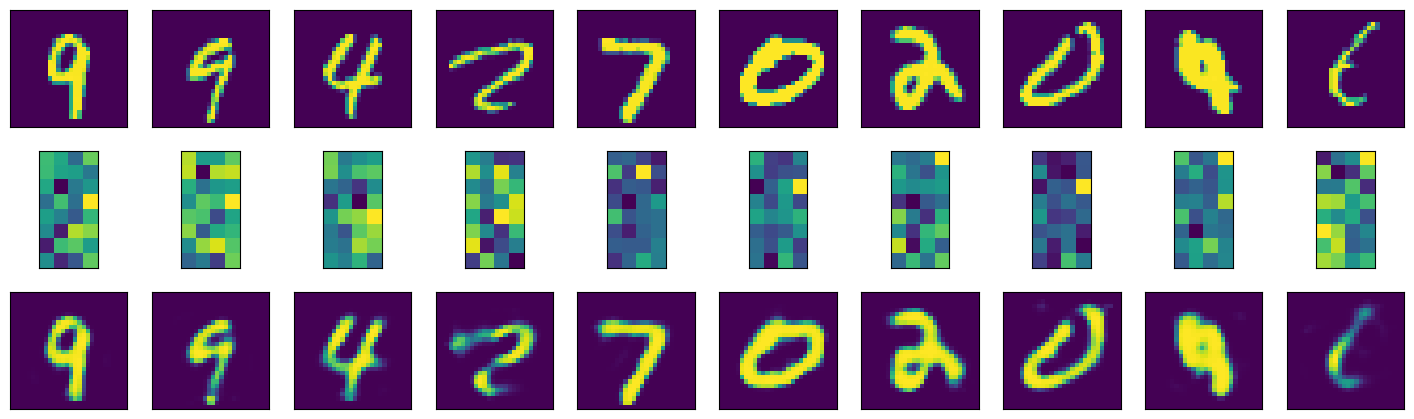

In [50]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
  #print(i)
  #print(indice_imagem)

  # Imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(X_teste[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())

  # Imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
  plt.xticks(())
  plt.yticks(())

  # Imagem reconstruída
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())